Random Synaptic Weights:
first set: [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]]
Second set: [[-0.70648822]
 [-0.81532281]]
synaptic weights after training
first set: [[-0.1132544   0.51970137]
 [-0.94472054 -0.3127588 ]]
Second set: [[-0.74846518]
 [-0.70636712]]
Input 1: 2
Input 2: 3
output Data: 
[[1.00000548]]


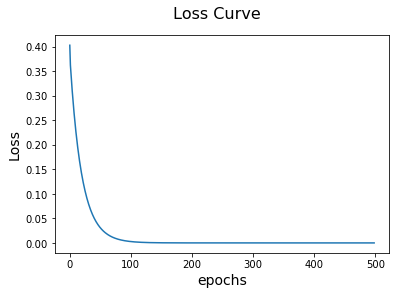

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork():
    def __init__(self):
        # Generate random numbers
        np.random.seed(1)

        # Assign random weights to a 3 x 1 matrix,
        self.synaptic_weights1 = 2 * np.random.random((2, 2)) - 1
        self.synaptic_weights2 = 2 * np.random.random((2, 1)) - 1
        #error list
        self.err_track = []
    # The neural network thinks.
    def think(self, inputs):
        inputs = inputs.astype(float)
        output1 = np.matmul(self.synaptic_weights1,inputs)
        output = np.matmul(output1.T,self.synaptic_weights2)
        return output,output1

    # Train the neural network and adjust the weights each time.
    def train(self,training_inputs, training_outputs,training_iterations):
        
        for iteration in range(training_iterations):

            # Pass the training set through the network.
            output,output1 = self.think(training_inputs)

            # Calculate the error
            error = 0.5*((output-training_outputs)**2)
            #learning rate
            a = 0.001
            # after derivating the loss function
            delta = output-training_outputs

            # Adjust the weights by a factor
            adjustment2 = a * delta * output1
            self.synaptic_weights2 -= adjustment2

            adjustment1 = a * delta * np.matmul(self.synaptic_weights2,training_inputs.T)           
            self.synaptic_weights1 -= adjustment1

            self.err_track.append(error)

if __name__ == "__main__":
    # Initialize
    neural_network = NeuralNetwork()

    print("Random Synaptic Weights:")
    print("first set:",neural_network.synaptic_weights1)
    print("Second set:",neural_network.synaptic_weights2)
    # The training set.
    training_inputs = np.array([[2], [3]])
    training_outputs = np.array([[1]])

    # Train the neural network
    neural_network.train(training_inputs, training_outputs, 500)

    print("synaptic weights after training")
    print("first set:",neural_network.synaptic_weights1)
    print("Second set:",neural_network.synaptic_weights2)
    A = str(input("Input 1: "))
    B = str(input("Input 2: "))

    print("output Data: ")
    out,_ = neural_network.think(np.array([[A], [B]]))
    print(out)

    #plot loss
    loss_er = np.delete(neural_network.err_track, 1, None)
    epchs = range(0,499)
    fig =  plt.figure()
    plt.plot(epchs,loss_er)
    fig.suptitle('Loss Curve', fontsize=16)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.show()